In [1]:
#Removing deprecation warnings
import warnings 
warnings.filterwarnings("ignore")

In [2]:
#Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from operator import add
import seaborn as sns
%matplotlib inline

In [3]:
#Load the data
dt=pd.read_csv("Heart_Data.csv")
dt.head() 


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
#Removing education column
dt.drop(["education"], axis=1, inplace=True)
dt.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
#Exploratory data analysis
missing_data=dt.isnull().sum()
total_missing=(missing_data.sum()/dt.shape[0])*100
print(f"The total percentage of missing data is {round(total_missing,2)}%")

The total percentage of missing data is 12.74%


In [6]:
#Finding individual percentage.
total=dt.isnull().sum().sort_values(ascending=False)
percent_total=(dt.isnull().sum()/dt.isnull().count()).sort_values(ascending=False)*100
missing=pd.concat([total,percent_total],axis=1,keys=["Total","Percentage (%)"])
missing_data=missing[missing["Total"]>0]
missing_data


,Total,Percentage (%)
glucose,388,9.150943
BPMeds,53,1.250000
totChol,50,1.179245
cigsPerDay,29,0.683962
BMI,19,0.448113
heartRate,1,0.023585


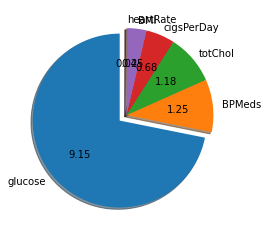

In [7]:
#Plot a graph
labels = missing_data.index
sizes = missing_data["Percentage (%)"]
explode = (0.1, 0, 0, 0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')
def absolute_value(val):
    a  =np.round(val/100.*sizes.sum(),2)
    return a
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct=absolute_value,
        shadow=True, startangle=90)
#ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
#Data shown is in percentage.



In [8]:
#Removing missing dataset
new_dt=dt.dropna(axis=0)


In [9]:
new_dt.shape

(3751, 15)

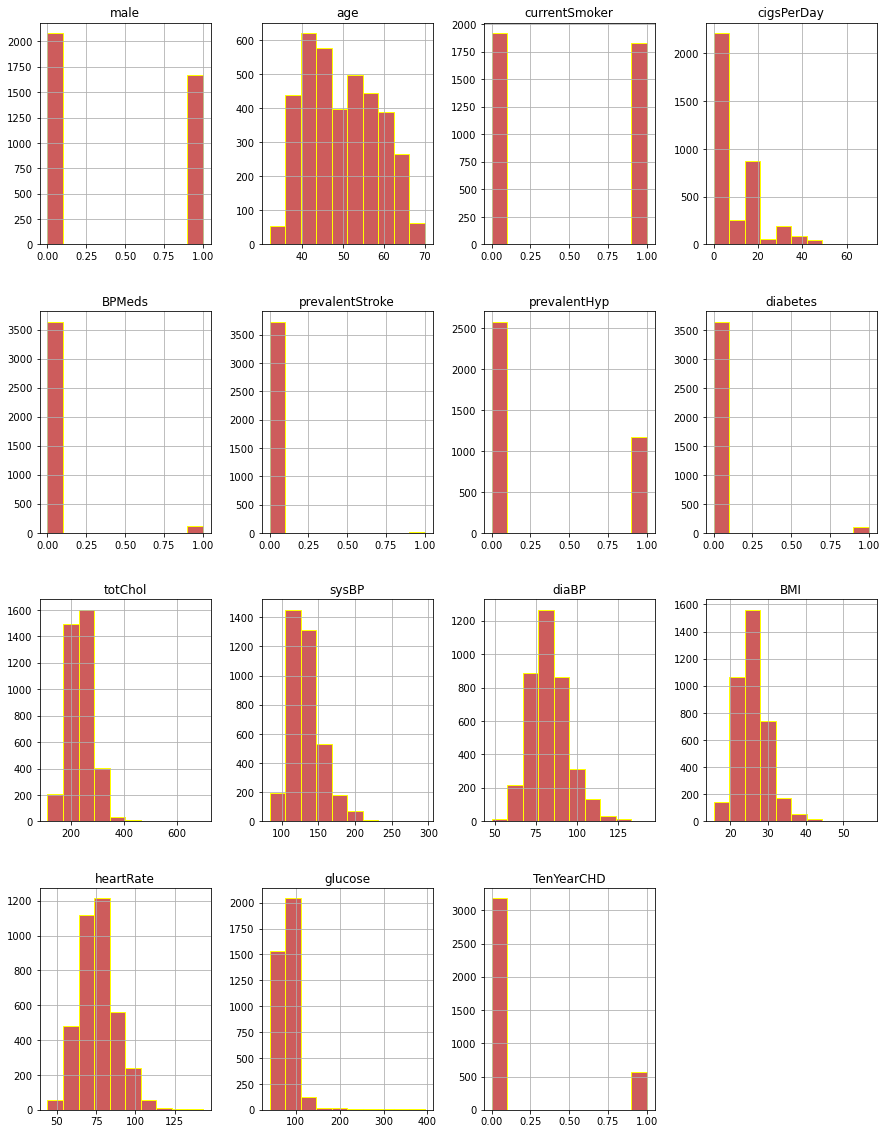

In [10]:

fig = plt.figure(figsize = (15,20))
fig.patch.set_facecolor('white')
ax = fig.gca()
new_dt.hist(ax = ax, color="#CD5C5C", ec="yellow")

plt.show()

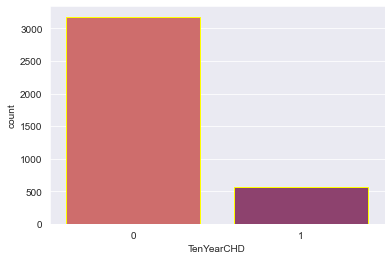

In this study, there are 3179 patients with no Coronary Heart Disease and 572 patients with Coronary Heart Disease.


In [11]:
sns.set_style("darkgrid")
sns.countplot(x="TenYearCHD",data=new_dt, palette="flare",ec="yellow")
plt.show()
cases=new_dt.TenYearCHD.value_counts()
print(f"In this study, there are {cases[0]} patients with no Coronary Heart Disease and {cases[1]} patients with Coronary Heart Disease.")


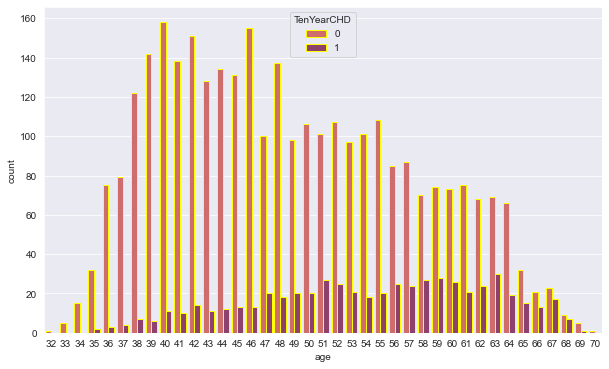

In [12]:
#Number of people who have Coronary Heart Disease vs Age
plt.figure(figsize=(10,6))
sns.countplot(x="age", data=new_dt, hue="TenYearCHD",palette="flare", ec="yellow")
plt.show()


In [13]:
#Data Analyis
def stacked_barchart(data, title=None, ylabel=None, xlabel=None):
    default_colors = ["#CD5C5C","#6F334D"]
    # From raw value to percentage
    totals = data.sum(axis=1)
    bars = ((data.T / totals) * 100).T
    r = list(range(data.index.size))

    # Plot
    barWidth = 0.95
    names = data.index.tolist()
    bottom = [0] * bars.shape[0]

    # Create bars
    color_index = 0
    plots = []
    for bar in bars.columns:
        plots.append(plt.bar(r, bars[bar], bottom=bottom, color=default_colors[color_index], edgecolor='yellow', width=barWidth))
        bottom = list(map(add, bottom, bars[bar]))
        color_index = 0 if color_index >= len(default_colors) else color_index + 1

    # Custom x axis
    plt.title(title)
    plt.xticks(r, names)
    plt.xlabel(data.index.name if xlabel is None else xlabel)
    plt.ylabel(data.columns.name if ylabel is None else ylabel)
    ax = plt.gca()
        
    y_labels = ax.get_yticks()
    ax.set_yticklabels([str(y) + '%' for y in y_labels])

    flat_list = [item for sublist in data.T.values for item in sublist]
    for i, d in zip(ax.patches, flat_list):
        data_label = str(d) + " (" + str(round(i.get_height(), 2)) + "%)"
        ax.text(i.get_x() + 0.45, i.get_y() + 5, data_label, horizontalalignment='center', verticalalignment='center', fontdict = dict(color = 'white', size = 20))

    for item in ([ax.title]):
        item.set_fontsize(27)
        
    for item in ([ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(24)
    
    legend = ax.legend(plots, bars.columns.tolist(), fancybox=True)
    plt.setp(legend.get_texts(), fontsize='20')

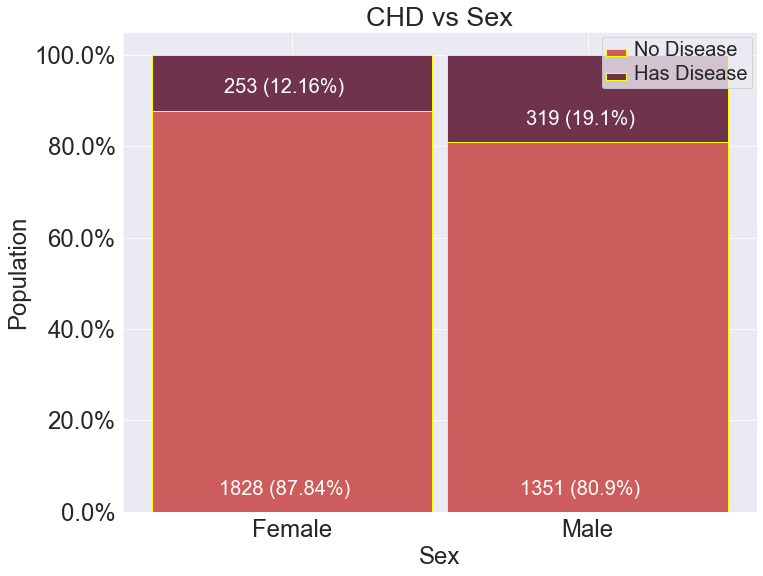

In [14]:
#Graph:CHDvsSex
fig=plt.gcf()
fig.set_size_inches(25,30)
grid_rows=3
grid_cols=2
plt.subplot(grid_rows, grid_cols, 1)
temp = new_dt[['male','TenYearCHD']].groupby(['male','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Female', 1:'Male'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'CHD vs Sex', ylabel = 'Population',xlabel="Sex")

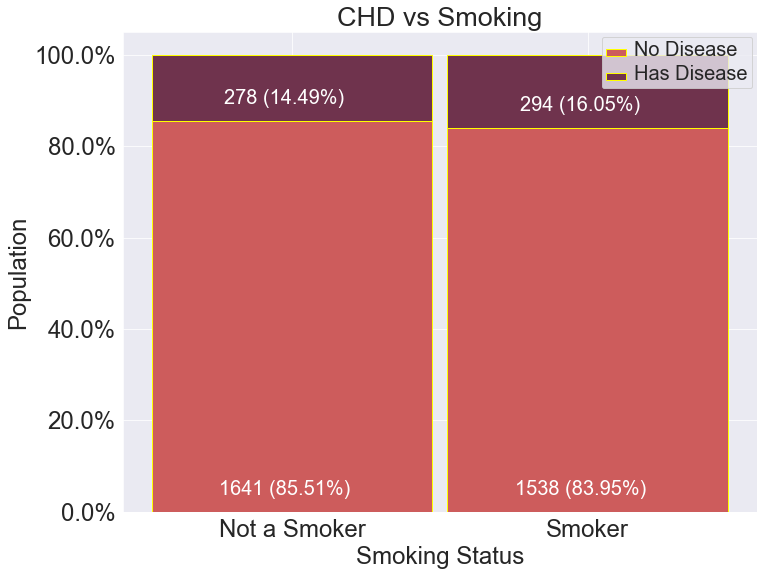

In [15]:
#Barplot:CHDvsSmoking
fig=plt.gcf()
fig.set_size_inches(25,30)
grid_rows=3
grid_cols=2
plt.subplot(grid_rows, grid_cols, 2)
temp = new_dt[['currentSmoker','TenYearCHD']].groupby(['currentSmoker','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not a Smoker', 1:'Smoker'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'CHD vs Smoking', ylabel = 'Population',xlabel="Smoking Status")


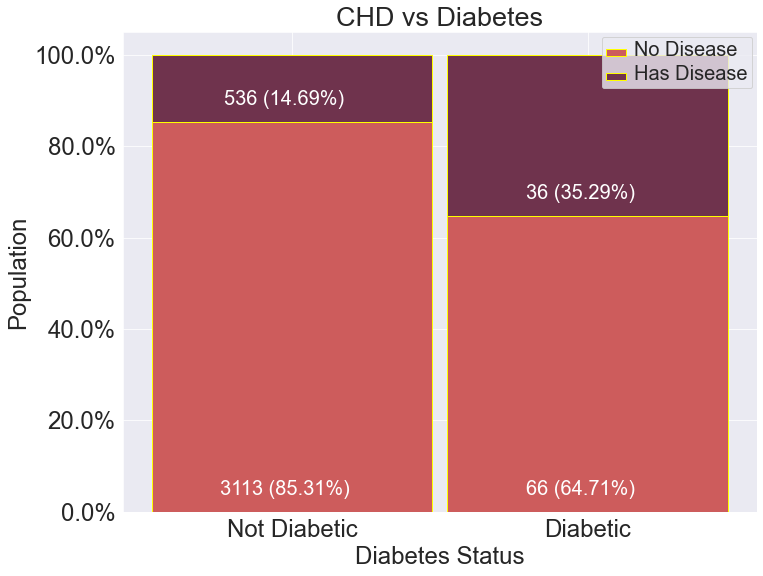

In [16]:
#Barplot:CHDvsDiabetes
fig=plt.gcf()
fig.set_size_inches(25,30)
grid_rows=3
grid_cols=2
plt.subplot(grid_rows, grid_cols, 3)
temp = new_dt[['diabetes','TenYearCHD']].groupby(['diabetes','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not Diabetic', 1:'Diabetic'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'CHD vs Diabetes', ylabel = 'Population', xlabel="Diabetes Status")


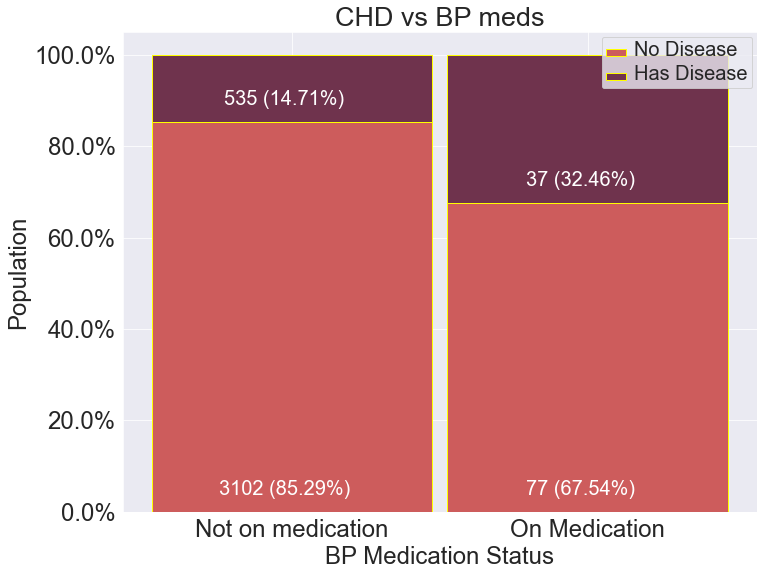

In [17]:
#Barplot:CHDvsBPMedication
fig=plt.gcf()
fig.set_size_inches(25,30)
grid_rows=3
grid_cols=2
plt.subplot(grid_rows, grid_cols, 4)
temp = new_dt[['BPMeds','TenYearCHD']].groupby(['BPMeds','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not on medication', 1:'On Medication'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'CHD vs BP meds', ylabel = 'Population', xlabel="BP Medication Status")


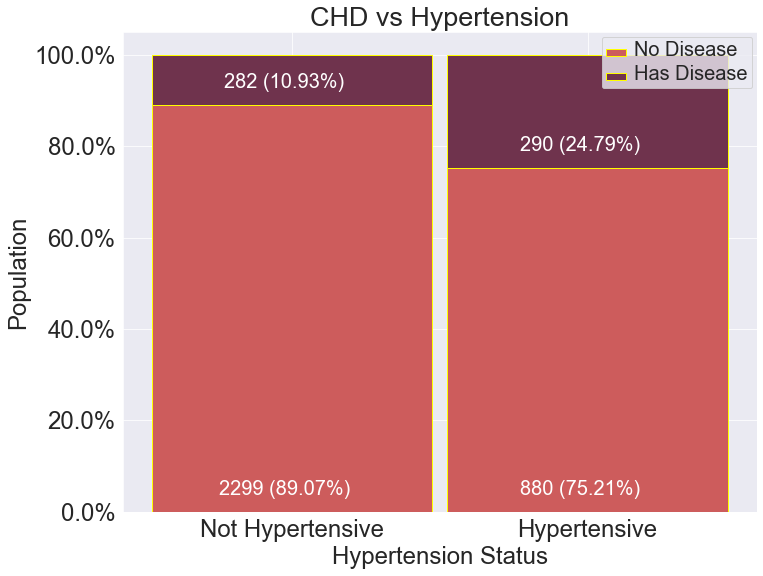

In [18]:
#Barplot:CHDvsHypertension
fig=plt.gcf()
fig.set_size_inches(25,30)
grid_rows=3
grid_cols=2
plt.subplot(grid_rows, grid_cols, 5)
plt.subplot(grid_rows, grid_cols, 5)
temp = new_dt[['prevalentHyp','TenYearCHD']].groupby(['prevalentHyp','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not Hypertensive', 1:'Hypertensive'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'CHD vs Hypertension', ylabel = 'Population',xlabel="Hypertension Status")


Text(0.5, 1.0, 'Correlation Heatmap')

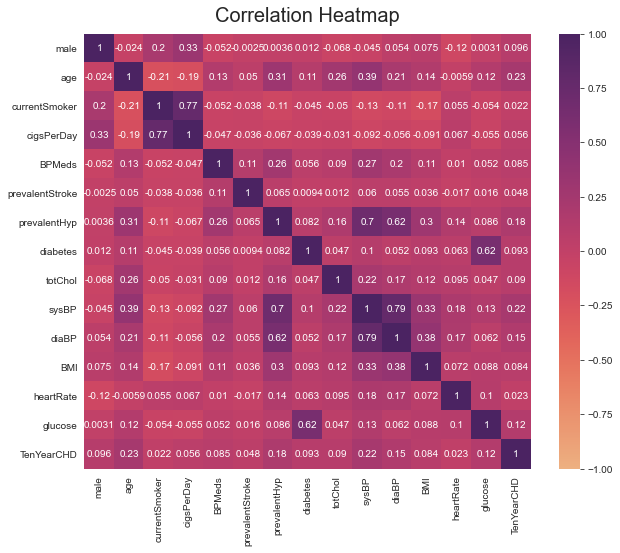

In [19]:
#Correlation Heat Map
plt.figure(figsize=(10,8))
mp=sns.heatmap(new_dt.corr(),vmin=-1,vmax=1,annot=True,cmap="flare")
mp.set_title("Correlation Heatmap", fontdict={'fontsize':20},pad=12)




In [20]:
#Feature Selection to remove the features that are not important
new_dt.dtypes

male                 int64
age                  int64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [21]:
new_dt.shape

(3751, 15)

In [22]:
new_dt.columns


Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [23]:
#Label Encoding(Not needed)
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
X_en=new_dt.iloc[:,14].values
X_en=labelencoder.fit_transform(X_en)

In [24]:
y=new_dt["TenYearCHD"]
x=new_dt.iloc[:,0:14]
x.head()


,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [25]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

In [26]:
full_data=x.copy()
full_data["TenYearCHD"]=y
print(full_data.head())

   male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39              0         0.0     0.0                0   
1     0   46              0         0.0     0.0                0   
2     1   48              1        20.0     0.0                0   
3     0   61              1        30.0     0.0                0   
4     0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0  


In [27]:
imp_feat=full_data.drop("TenYearCHD",axis=1).apply(lambda x: x.corr(full_data.TenYearCHD))
print(imp_feat)

male               0.096000
age                0.231584
currentSmoker      0.021709
cigsPerDay         0.055920
BPMeds             0.084740
prevalentStroke    0.047684
prevalentHyp       0.178615
diabetes           0.093222
totChol            0.089613
sysBP              0.220108
diaBP              0.148994
BMI                0.084400
heartRate          0.022658
glucose            0.124117
dtype: float64


In [28]:
indices=np.argsort(imp_feat)
print(indices.sort_index(ascending=False))

totChol             0
sysBP              13
prevalentStroke     4
prevalentHyp        8
male                2
heartRate           9
glucose             1
diabetes            7
diaBP              10
currentSmoker       5
cigsPerDay          3
age                12
BPMeds             11
BMI                 6
dtype: int64


In [29]:
print(imp_feat.sort_values())

currentSmoker      0.021709
heartRate          0.022658
prevalentStroke    0.047684
cigsPerDay         0.055920
BMI                0.084400
BPMeds             0.084740
totChol            0.089613
diabetes           0.093222
male               0.096000
glucose            0.124117
diaBP              0.148994
prevalentHyp       0.178615
sysBP              0.220108
age                0.231584
dtype: float64


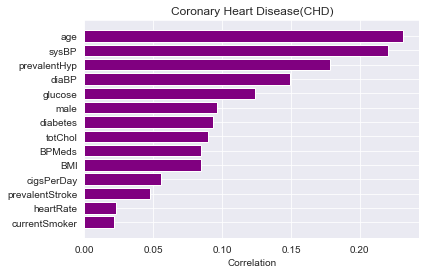

In [30]:
names=["male","age","currentSmoker","cigsPerDay","BPMeds","prevalentStroke","prevalentHyp","diabetes","totChol","sysBP","diaBP","BMI","heartRate","glucose"]
plt.title("Coronary Heart Disease(CHD)")
#Plotting a graph to show the correlation.
plt.barh(range(len(indices)),imp_feat[indices],color="purple",align="center")
plt.yticks(range(len(indices)),[names[i] for i in indices])
plt.xlabel("Correlation")
plt.show()


In [31]:
top_features=["age","totChol","sysBP","diaBP","BMI","heartRate","glucose"]
top_features

['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

In [32]:
import statsmodels.api as sm
x_top=new_dt[top_features]
y=new_dt["TenYearCHD"]

In [33]:
res=sm.Logit(y,x_top).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.416958
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3751
Model:                          Logit   Df Residuals:                     3744
Method:                           MLE   Df Model:                            6
Date:                Wed, 25 May 2022   Pseudo R-squ.:                 0.02354
Time:                        16:10:13   Log-Likelihood:                -1564.0
converged:                       True   LL-Null:                       -1601.7
Covariance Type:            nonrobust   LLR p-value:                 3.174e-14
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0223      0.006      3.982      0.000       0.011       0.033
totChol       -0.0029      0.001     -2.716      0.007      -0.005      -0.001
sysBP          0.0245      0.003      7.436      0.000       0.018       0.031
diaBP         -0.0270      0.006     -4.603      0.000      -0.038      -0.015
BMI           -0.0499      0.012     -4.185      0.000      -0.073      -0.027
heartRate     -0.0298      0.004     -8.064      0.000      -0.037      -0.023
glucose        0.0043      0.002      2.616      0.009       0.001       0.007
==============================================================================
"""

In [34]:
params=res.params
conf=res.conf_int()
conf["Odds Ratio"]=params
conf.columns=["5%","95%","Odds Ratio"]
print(np.exp(conf))

                 5%       95%  Odds Ratio
age        1.011381  1.033813    1.022536
totChol    0.994963  0.999184    0.997071
sysBP      1.018236  1.031493    1.024843
diaBP      0.962258  0.984627    0.973378
BMI        0.929304  0.973798    0.951291
heartRate  0.963690  0.977730    0.970685
glucose    1.001074  1.007518    1.004291


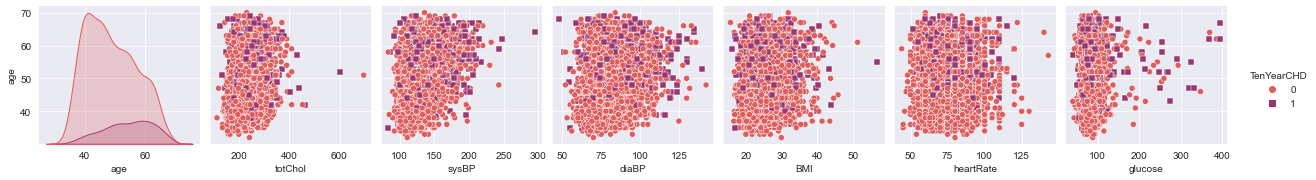

In [35]:
#sns.pairplot(new_dt, hue = 'TenYearCHD', markers=["o", "s"], vars = top_features, palette = sns.color_palette("flare", 2))
sns.pairplot(new_dt, hue = 'TenYearCHD', markers=["o", "s"], y_vars = ["age"],x_vars=["age","totChol","sysBP","diaBP","BMI","heartRate","glucose"],palette = sns.color_palette("flare", 2))


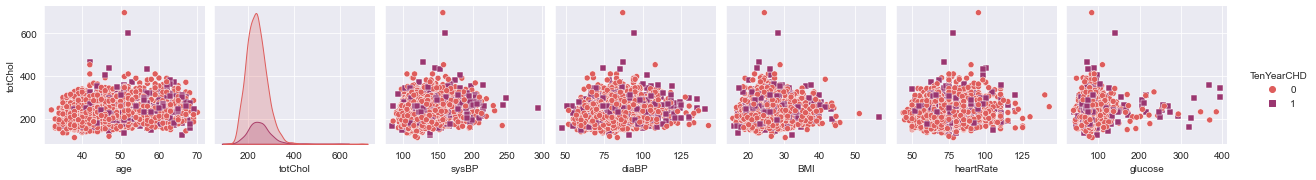

In [36]:
sns.pairplot(new_dt, hue = 'TenYearCHD', markers=["o", "s"], y_vars = ["totChol"],x_vars=["age","totChol","sysBP","diaBP","BMI","heartRate","glucose"],palette = sns.color_palette("flare", 2))


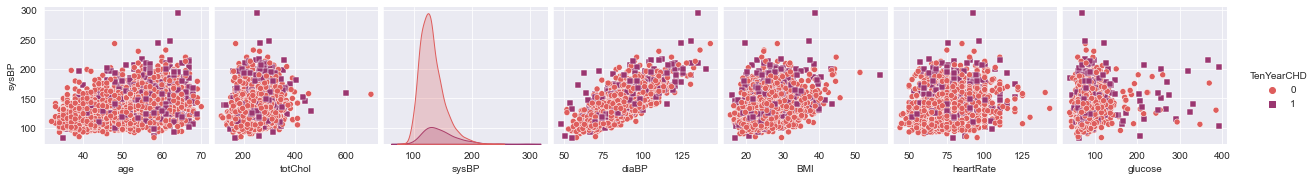

In [37]:
sns.pairplot(new_dt, hue = 'TenYearCHD', markers=["o", "s"], y_vars = ["sysBP"],x_vars=["age","totChol","sysBP","diaBP","BMI","heartRate","glucose"],palette = sns.color_palette("flare", 2))


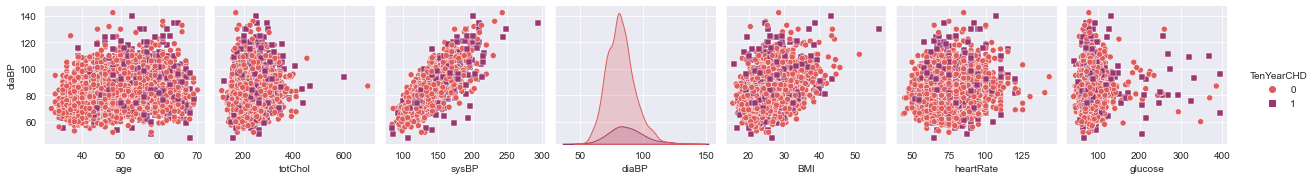

In [38]:
sns.pairplot(new_dt, hue = 'TenYearCHD', markers=["o", "s"], y_vars = ["diaBP"],x_vars=["age","totChol","sysBP","diaBP","BMI","heartRate","glucose"],palette = sns.color_palette("flare", 2))


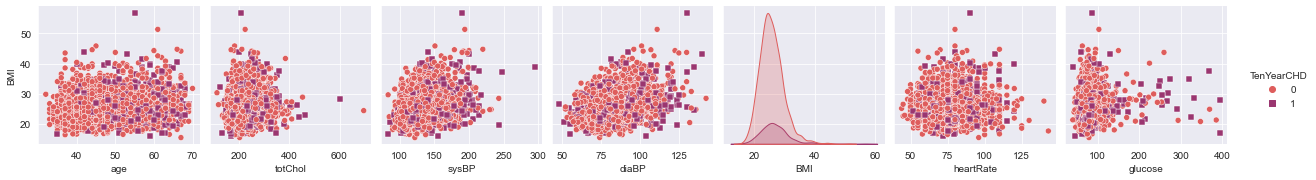

In [39]:
sns.pairplot(new_dt, hue = 'TenYearCHD', markers=["o", "s"], y_vars = ["BMI"],x_vars=["age","totChol","sysBP","diaBP","BMI","heartRate","glucose"],palette = sns.color_palette("flare", 2))


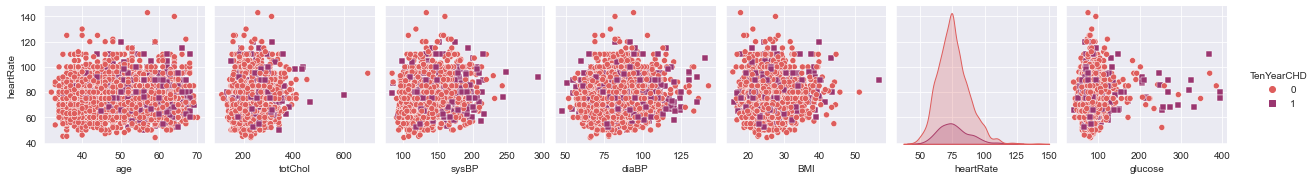

In [40]:
sns.pairplot(new_dt, hue = 'TenYearCHD', markers=["o", "s"], y_vars = ["heartRate"],x_vars=["age","totChol","sysBP","diaBP","BMI","heartRate","glucose"],palette = sns.color_palette("flare", 2))


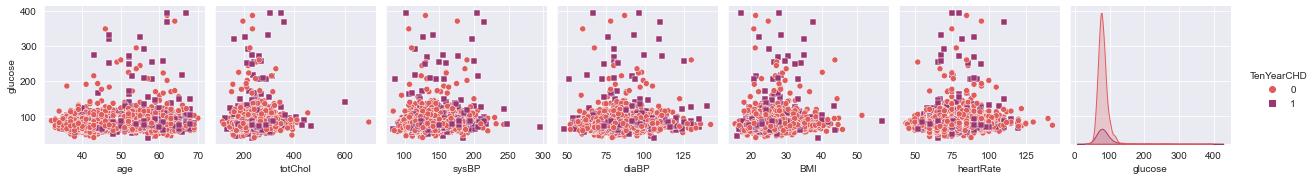

In [41]:
sns.pairplot(new_dt, hue = 'TenYearCHD', markers=["o", "s"], y_vars = ["glucose"],x_vars=["age","totChol","sysBP","diaBP","BMI","heartRate","glucose"],palette = sns.color_palette("flare", 2))


In [42]:
#Implementing SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter



In [43]:
x = new_dt[top_features]
y = new_dt.iloc[:,-1]

In [44]:
# the numbers before smote
num_before = dict(Counter(y))

#perform smoting

# define pipeline
over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
x_smote, y_smote = pipeline.fit_resample(x, y)


#the numbers after smote
num_after =dict(Counter(y_smote))

In [45]:
print(num_before, num_after)

{0: 3179, 1: 572} {0: 3178, 1: 2543}


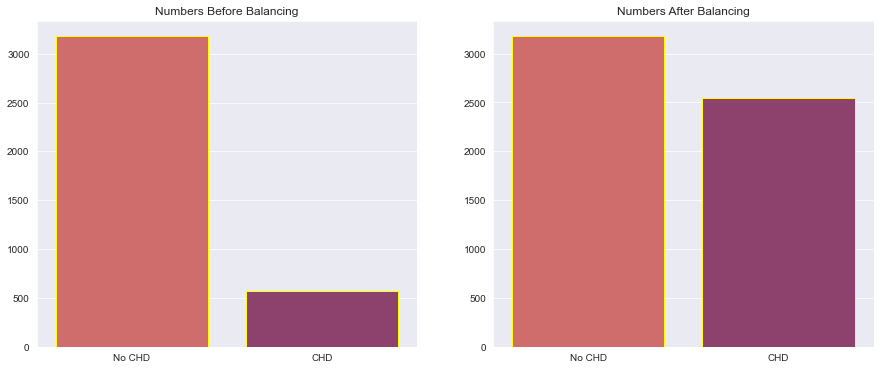

In [46]:
labels = ["No CHD","CHD"]
default_colors = ["#CD5C5C","#6F334D"]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(labels, list(num_before.values()), palette="flare", ec="yellow")
plt.title("Numbers Before Balancing")
plt.subplot(1,2,2)
sns.barplot(labels, list(num_after.values()),palette="flare", ec="yellow")
plt.title("Numbers After Balancing")
plt.show()

In [47]:
#Splitting Data in Testing and Training Data Set
new_data = pd.concat([pd.DataFrame(x_smote), pd.DataFrame(y_smote)], axis=1)
new_data.columns = ['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose','TenYearCHD']
new_data.head()

,age,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,45,285.0,132.5,97.5,24.74,98.0,77.0,0
1,44,193.0,134.0,88.0,23.77,75.0,77.0,0
2,36,210.0,112.0,85.5,21.93,71.0,77.0,0
3,59,313.0,186.5,99.0,25.65,72.0,84.0,0
4,60,270.0,130.0,72.5,20.84,75.0,102.0,0


In [48]:
x_new = new_data[top_features]
y_new= new_data.iloc[:,-1]
x_new.head()

,age,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,45,285.0,132.5,97.5,24.74,98.0,77.0
1,44,193.0,134.0,88.0,23.77,75.0,77.0
2,36,210.0,112.0,85.5,21.93,71.0,77.0
3,59,313.0,186.5,99.0,25.65,72.0,84.0
4,60,270.0,130.0,72.5,20.84,75.0,102.0


In [49]:
#Splitting the data using train_train_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_new,y_new,test_size=.2,random_state=42)

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [51]:
#Model-Logistic Regresssion
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

In [52]:
# search for optimun parameters using gridsearch
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
logistic_clf = GridSearchCV(LogisticRegression(),param_grid=params,cv=10)

In [53]:
#train the classifier
logistic_clf.fit(x_train,y_train)

logistic_clf.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2'}

In [54]:
#Making predictions
logistic_predict = logistic_clf.predict(x_test)
log_accuracy = accuracy_score(y_test,logistic_predict)
print(f"Using logistic regression we get an accuracy of {round(log_accuracy*100,2)}%")

Using logistic regression we get an accuracy of 65.15%


The f1 score for logistic regression is 61.52%


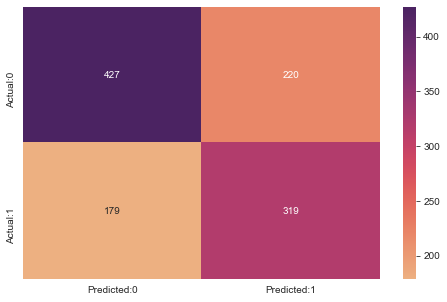

In [55]:
cm=confusion_matrix(y_test,logistic_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="flare")
logistic_f1 = f1_score(y_test, logistic_predict)
print(f'The f1 score for logistic regression is {round(logistic_f1*100,2)}%')

In [56]:
print(classification_report(y_test,logistic_predict))
logistic_f1 = f1_score(y_test, logistic_predict)
print(f'The f1 score for logistic regression is {round(logistic_f1*100,2)}%')

              precision    recall  f1-score   support

           0       0.70      0.66      0.68       647
           1       0.59      0.64      0.62       498

    accuracy                           0.65      1145
   macro avg       0.65      0.65      0.65      1145
weighted avg       0.66      0.65      0.65      1145

The f1 score for logistic regression is 61.52%


In [57]:
logistic_f1 = f1_score(y_test, logistic_predict)
print(f'The f1 score for logistic regression is {round(logistic_f1*100,2)}%')

The f1 score for logistic regression is 61.52%


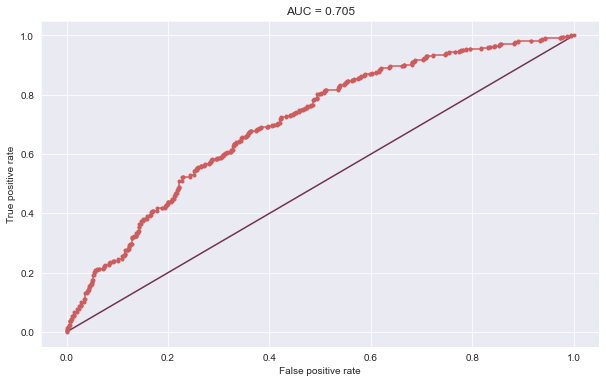

In [58]:
probs = logistic_clf.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
#default_colors = ["#CD5C5C","#6F334D"]
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='-',color="#6F334D")
plt.plot(fpr, tpr, marker='.',color="#CD5C5C")
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()


In [59]:
#Model- K Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier
# search for optimun parameters using gridsearch
params= {'n_neighbors': np.arange(1, 10)}
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params, 
                           scoring = 'accuracy', cv = 10, n_jobs = -1)
knn_clf = GridSearchCV(KNeighborsClassifier(),params,cv=3, n_jobs=-1)

In [60]:
#Training the model
knn_clf.fit(x_train,y_train)
knn_clf.best_params_ 
{'n_neighbors': 1}
# predictions
knn_predict = knn_clf.predict(x_test)
#accuracy
knn_accuracy = accuracy_score(y_test,knn_predict)
print(f"Using k-nearest neighbours we get an accuracy of {round(knn_accuracy*100,2)}%")

Using k-nearest neighbours we get an accuracy of 84.89%


<AxesSubplot:>

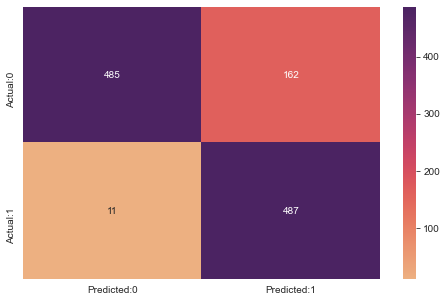

In [61]:
cm=confusion_matrix(y_test,knn_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="flare")

In [62]:
print(classification_report(y_test,knn_predict))
knn_f1 = f1_score(y_test, knn_predict)
print(f'The f1 score for K nearest neignbours is {round(knn_f1*100,2)}%')


              precision    recall  f1-score   support

           0       0.98      0.75      0.85       647
           1       0.75      0.98      0.85       498

    accuracy                           0.85      1145
   macro avg       0.86      0.86      0.85      1145
weighted avg       0.88      0.85      0.85      1145

The f1 score for K nearest neignbours is 84.92%


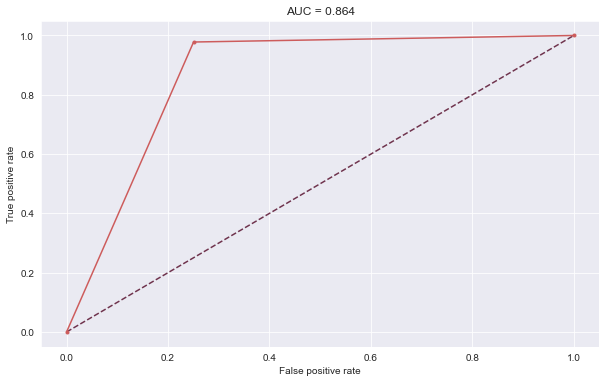

In [63]:
# ROC curve and AUC 
probs = knn_clf.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--',color="#6F334D")
plt.plot(fpr, tpr, marker='.',color="#CD5C5C")
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(knn_auc,3)}")
plt.show()

In [64]:
#Model- Decision Trees
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(random_state=7)
# grid search for optimum parameters
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]}
tree_clf = GridSearchCV(dtree, param_grid=params, n_jobs=-1)
# train the model
tree_clf.fit(x_train,y_train)
tree_clf.best_params_ 

{'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}

In [65]:
# predictions
tree_predict = tree_clf.predict(x_test)
#accuracy
tree_accuracy = accuracy_score(y_test,tree_predict)
print(f"Using Decision Trees we get an accuracy of {round(tree_accuracy*100,2)}%")

Using Decision Trees we get an accuracy of 75.2%


<AxesSubplot:>

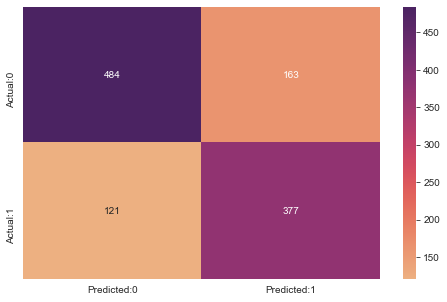

In [66]:
cm=confusion_matrix(y_test,tree_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="flare")

In [67]:
tree_f1 = f1_score(y_test, tree_predict)
print(f'The f1 score Descision trees is {round(tree_f1*100,2)}%')

The f1 score Descision trees is 72.64%


The f1 score Descision trees is 72.64%


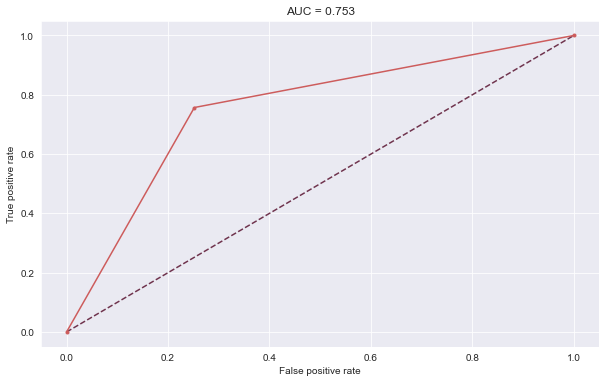

In [68]:
tree_f1 = f1_score(y_test, tree_predict)
print(f'The f1 score Descision trees is {round(tree_f1*100,2)}%')
# ROC curve and AUC 
probs = tree_clf.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
tree_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--',color="#6F334D")
plt.plot(fpr, tpr, marker='.',color="#CD5C5C")
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(tree_auc,3)}")
plt.show()

In [69]:
#Model- Support Vector Machine (SVM)
from sklearn.svm import SVC
#grid search for optimum parameters
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
svm_clf = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, cv=10)
# train the model
svm_clf.fit(x_train,y_train)
svm_clf.best_params_ 

{'C': 10, 'gamma': 1}

In [70]:
svm_predict = svm_clf.predict(x_test)

<AxesSubplot:>

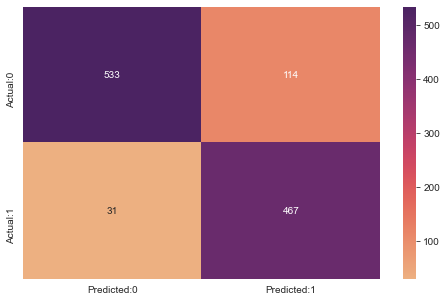

In [71]:
cm=confusion_matrix(y_test,svm_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="flare")

In [72]:
svm_f1 = f1_score(y_test, svm_predict)
print(f'The f1 score for SVM is {round(svm_f1*100,2)}%')

The f1 score for SVM is 86.56%


The f1 score for SVM is 86.56%


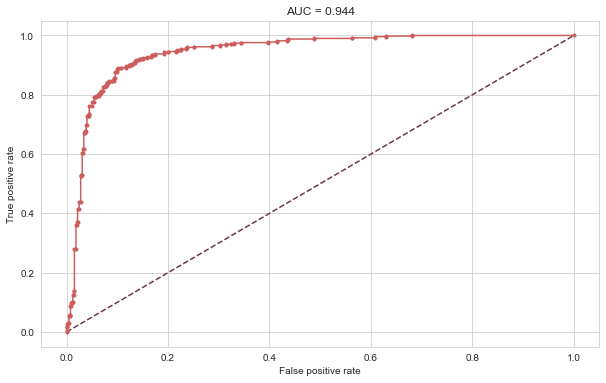

In [73]:

svm_f1 = f1_score(y_test, svm_predict)
print(f'The f1 score for SVM is {round(svm_f1*100,2)}%')# ROC curve and AUC 
probs = svm_clf.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
svm_auc = roc_auc_score(y_test, probs)
#accuracy
svm_accuracy = accuracy_score(y_test,svm_predict)
print(f"Using Decision Trees we get an accuracy of {round(t_accuracy*100,2)}%")

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--',color="#6F334D")
plt.plot(fpr, tpr, marker='.',color="#CD5C5C")
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(svm_auc,3)}")
plt.show()

In [74]:
#Model Comparison
comparison = pd.DataFrame({
    "Logistic regression":{'Accuracy':log_accuracy, 'AUC':log_auc, 'F1 score':logistic_f1},
    "K-nearest neighbours":{'Accuracy':knn_accuracy, 'AUC':knn_auc, 'F1 score':knn_f1},
    "Decision trees":{'Accuracy':tree_accuracy, 'AUC':tree_auc, 'F1 score':tree_f1},
    "Support vector machine":{'Accuracy':svm_accuracy, 'AUC':svm_auc, 'F1 score':svm_f1}
}).T
comparison

NameError: name 'svm_accuracy' is not defined

In [ ]:
fig = plt.gcf()
fig.set_size_inches(15, 15)
titles = ['AUC','Accuracy','F1 score']
for title,label in enumerate(comparison.columns):
    plt.subplot(2,2,title+1)
    sns.barplot(x=comparison.index, y = comparison[label], data=comparison,palette="flare")
    plt.xticks(fontsize=10)
    plt.title(titles[title])

plt.show()